## Perform EDA on the data and build a model which will predict whether the person will suffer from Heart- attack or not

In [538]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [539]:
df = pd.read_csv('US_Heart_Patients_1.csv')

In [540]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [541]:
df.shape

(4240, 16)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [543]:
## checking unique and value counts of all the objects in the dataset
for column in df.columns:
    print(column.upper(),':', df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0     

In [544]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [545]:
categorical = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']

In [546]:
for i in categorical:
    df[i] = df[i].astype('object')

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [548]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
    

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [549]:
round(df[num].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0
Heart-Att,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [550]:
round(df[cat].describe(),2).T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


In [551]:
## unique values for categorical variables
## checking unique and value counts of all the objects in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df[column].nunique())
        print()
        print(df[column].value_counts())
        print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

BP MEDS : 2

BP Meds
0.0    4056
1.0     124
Name: count, dtype: int64

PREVALENTSTROKE : 2

prevalentStroke
0.0    4206
1.0      25
Name: count, dtype: int64

PREVALENTHYP : 2

prevalentHyp
0.0    2922
1.0    1316
Name: count, dtype: int64

DIABETES : 2

diabetes
0.0    4129
1.0     109
Name: count, dtype: int64



## Null value analysis and treatment

In [553]:
(round(df.isnull().sum() * 100 / df.shape[0],2)).sort_values() ## if this greater than 30% then drop that column

Heart-Att          0.00
age                0.05
prevalentHyp       0.05
diabetes           0.05
currentSmoker      0.07
Systolic BP        0.09
heartRate          0.09
Diastolic BP       0.12
Gender             0.19
prevalentStroke    0.21
BMI                0.57
cigsPerDay         0.73
BP Meds            1.42
tot cholesterol    1.42
education          2.59
glucose            9.22
dtype: float64

## handling duplicate values

In [555]:
df.duplicated().sum()

0

In [556]:
## Null Value imputation for categorical variables
# df.Gender = df.Gender.fillna('Female')

In [557]:
# df.Gender.isnull().sum()

In [558]:
for column in ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']:
    df[column].fillna(df[column].mode()[0],inplace = True)

In [559]:
df.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BP Meds              0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [560]:
## Null Value imputation for numerical variables
## for mean
df_mean = df.copy()
df_median = df.copy()

In [561]:
for i in df_mean.columns:
    if df_mean[i].dtype != 'object':
        mean = df_mean[i].mean()
        df_mean[i] = df_mean[i].fillna(mean)

In [562]:
df_mean.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [563]:
## for median
for i in df_median.columns:
    if df_median[i].dtype != 'object':
        median = df_median[i].median()
        df_median[i] = df_median[i].fillna(median)

In [564]:
df_median.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [565]:
## for KNN - converted cat in num and then applied knn formula
df_knn = df.copy()

In [566]:
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

In [567]:
for i in ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']:
    df_knn[i] = df_knn[i].astype('float')

In [568]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   float64
 1   age              4238 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 530.1 KB


In [569]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # will consider 5 neighbours to predict
df_imputed=imputer.fit_transform(df_knn) 
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [570]:
df_knn.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

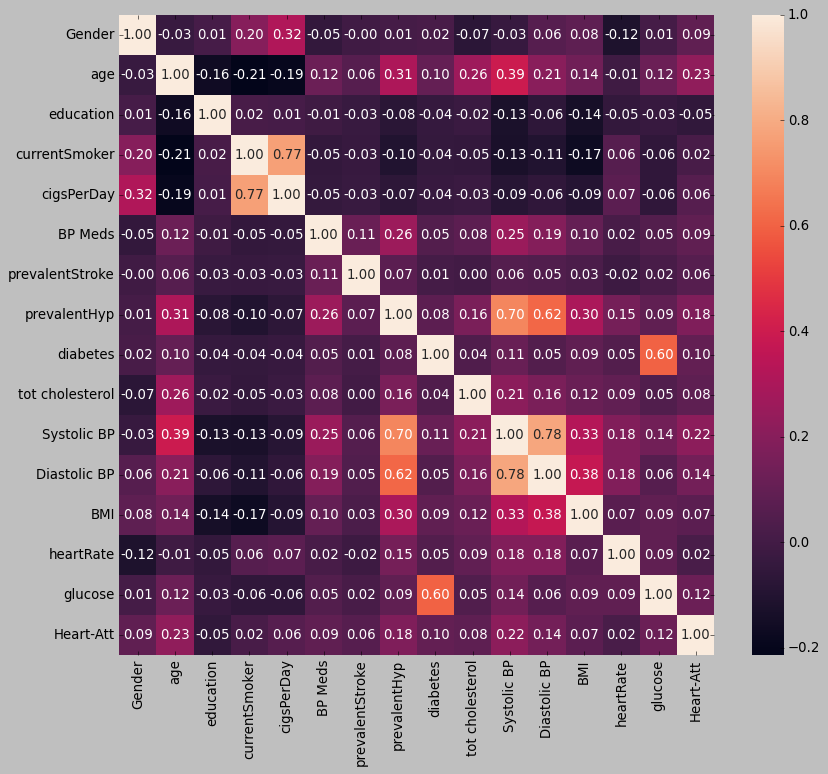

In [571]:
plt.figure(figsize=(12,10))
sns.heatmap(df_knn.corr(), annot=True, fmt=".2f")  # fmt=".2f" will round the numbers to 2 decimal places
plt.show()

### Univariate and Bivariate analysis 

In [573]:
df_mean['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

In [574]:
df_median['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

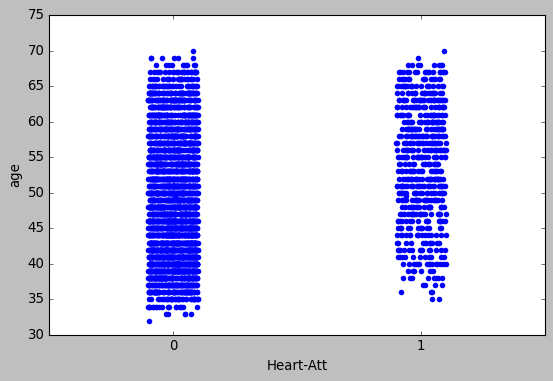

In [575]:
## Mean Dataset
plt.figure(figsize=(8,5))
sns.stripplot(x="Heart-Att", y="age", data=df_mean, jitter=True)  # Use x and y as keyword arguments
plt.show()

Observation - The density of having heart attack is more in age greater than 45 

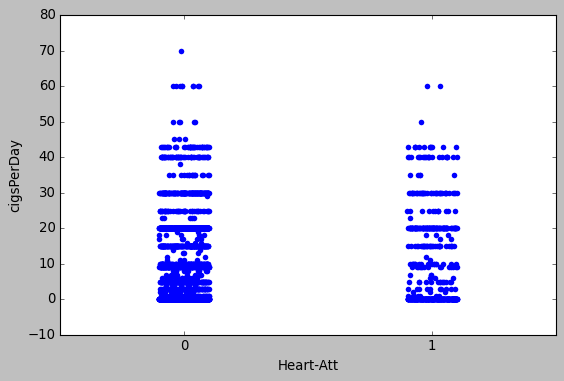

In [577]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Heart-Att", y="cigsPerDay", data=df_mean, jitter=True)  # Use x and y as keyword arguments
plt.show()

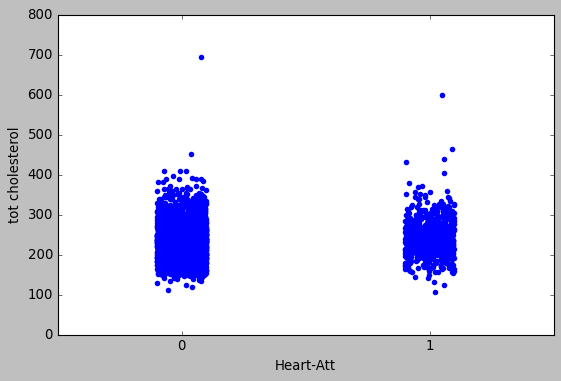

In [578]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Heart-Att", y="tot cholesterol", data=df_mean, jitter=True)  # Use x and y as keyword arguments
plt.show()

In [579]:
# pairplot = sns.pairplot(df_mean, hue="Heart-Att", palette="dark", diag_kind='kde',markers=["o", "s"])

# # Add a title
# pairplot.fig.suptitle("Pairplot of Heart Attack Data", y=1.02, fontsize=18)
# plt.show()

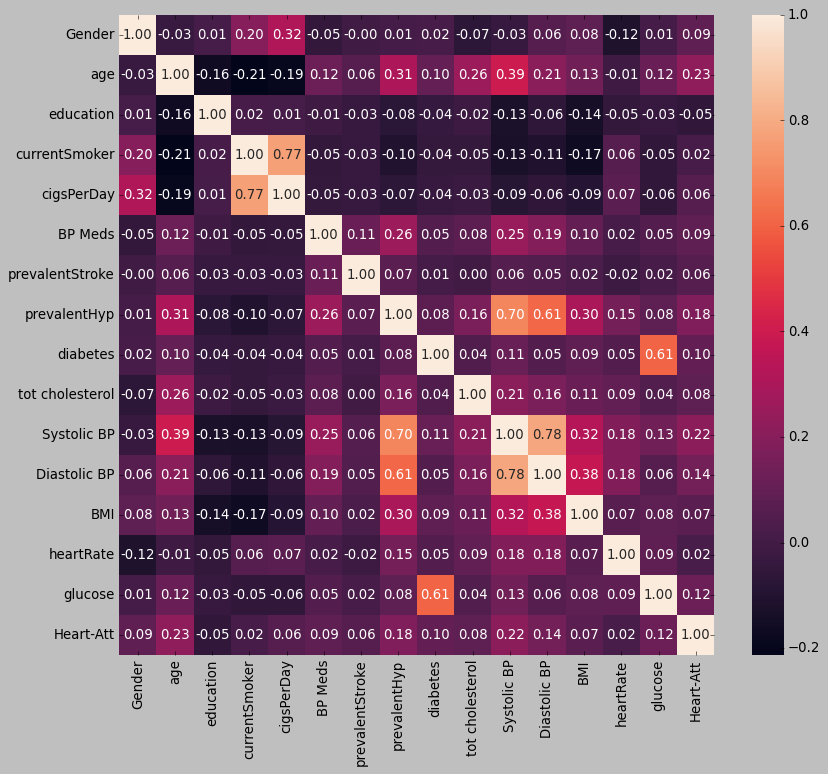

In [580]:
## correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(df_mean.corr(), annot=True, fmt=".2f")  # fmt=".2f" will round the numbers to 2 decimal places
plt.show()

observation : dropping currentsmoker and diastolic BP because their collinearity is high and to avoid multicolinearity

In [582]:
df_mean.drop(['currentSmoker','Diastolic BP'],axis=1,inplace=True)

In [583]:
df_mean.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0


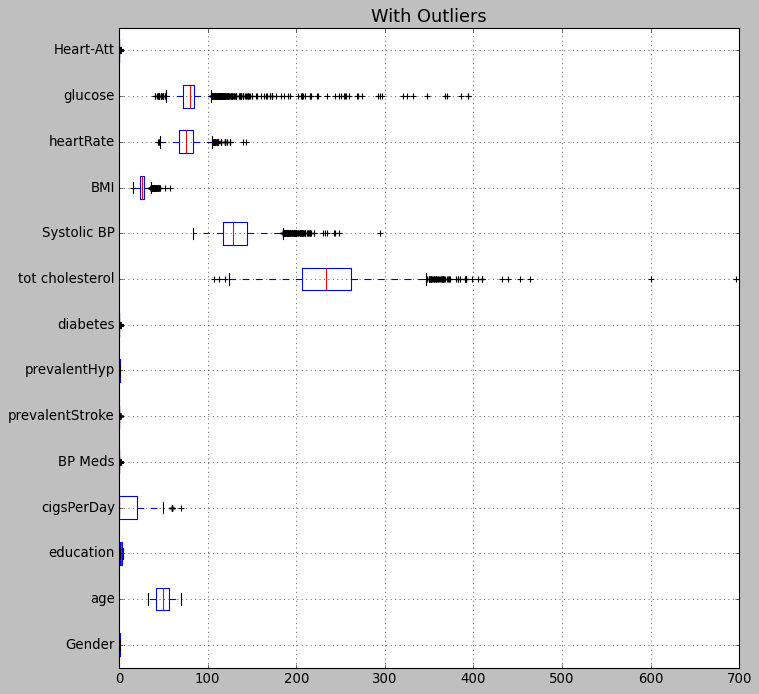

In [584]:
## Outlier Treatment for mean
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [585]:
df_mean_out = df_mean.copy()

In [586]:
## Removing Outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [587]:
remove_outlier(df_mean['tot cholesterol'])

(122.0, 346.0)

In [588]:
## Teating outlier for mean
# Iterate only over numeric columns
for column in df_mean_out.drop('glucose',axis=1).columns:
    
    lr, ur = remove_outlier(df_mean_out[column])
    
    # Replace values greater than upper range with upper range value
    df_mean_out[column] = np.where(df_mean_out[column] > ur, ur, df_mean_out[column])
    
    # Replace values smaller than lower range with lower range value
    df_mean_out[column] = np.where(df_mean_out[column] < lr, lr, df_mean_out[column])

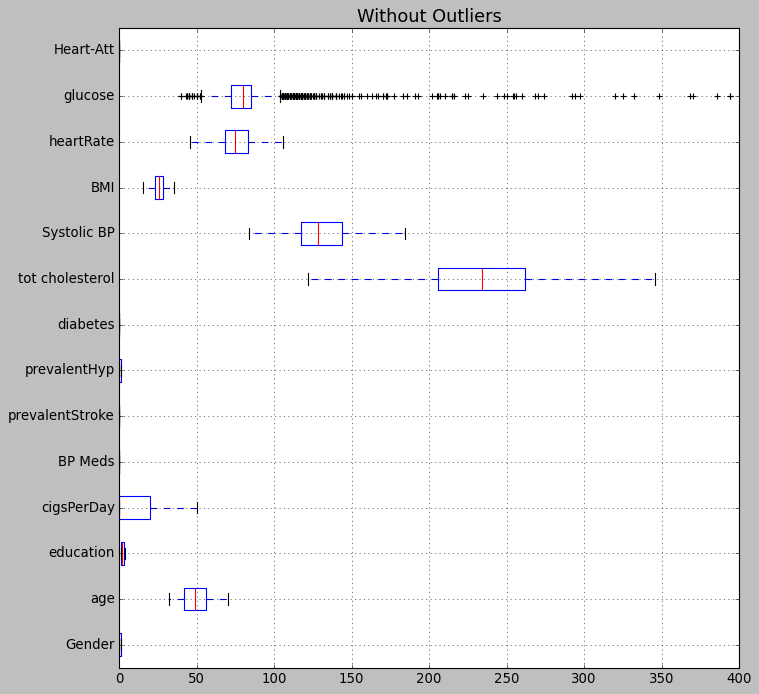

In [589]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [590]:
df_mean_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   diabetes         4240 non-null   float64
 8   tot cholesterol  4240 non-null   float64
 9   Systolic BP      4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  heartRate        4240 non-null   float64
 12  glucose          4240 non-null   float64
 13  Heart-Att        4240 non-null   float64
dtypes: float64(14)
memory usage: 463.9 KB


## Scaling - Brings variables to same scale

In [592]:
## min-max scaling on mean
df_mean_out = df_mean_out.drop(['BP Meds','prevalentStroke','diabetes'],axis=1).apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [593]:
df_mean = df_mean.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [594]:
df_mean_out

,Gender,age,education,cigsPerDay,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,0.184211,1.000000,0.00,0.0,0.325893,0.222772,0.571862,0.575000,0.104520,NaN
1,0.0,0.368421,0.333333,0.00,0.0,0.571429,0.371287,0.660931,0.825000,0.101695,NaN
2,1.0,0.421053,0.000000,0.40,0.0,0.549107,0.435644,0.489372,0.491667,0.084746,NaN
3,0.0,0.763158,0.666667,0.60,1.0,0.459821,0.658416,0.653340,0.325000,0.177966,NaN
4,0.0,0.368421,0.666667,0.46,0.0,0.727679,0.460396,0.376012,0.658333,0.127119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.40,0.0,0.562500,0.470297,0.320344,0.641667,0.129944,NaN
4236,0.0,0.315789,0.000000,0.30,0.0,0.392857,0.425743,0.176619,0.675000,0.118508,NaN
4237,0.0,0.526316,0.333333,0.00,0.0,0.656250,0.495050,0.293522,0.575000,0.189266,NaN
4238,1.0,0.210526,0.666667,0.00,1.0,0.281250,0.569307,0.502530,0.358333,0.090395,NaN


In [595]:
## Standard Scaler on mean
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_mean_out = pd.DataFrame(scaler.fit_transform(df_mean_out),columns=df_mean_out.columns)
# df_mean_out

## Model Building on Mean Data

In [597]:
X = df_mean.drop('Heart-Att',axis=1)
y = df_mean['Heart-Att']

In [598]:
## test range split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

## Naive Bayes

In [600]:
## Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [601]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [602]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train,y_train)

print(model_score)
print()
print(metrics.confusion_matrix(y_train,y_train_predict))
print()
print(metrics.classification_report(y_train,y_train_predict))

0.8261455525606469

[[2369  142]
 [ 374   83]]

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2511
         1.0       0.37      0.18      0.24       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968



Text(0.5, 1.0, 'Confusion Matrix')

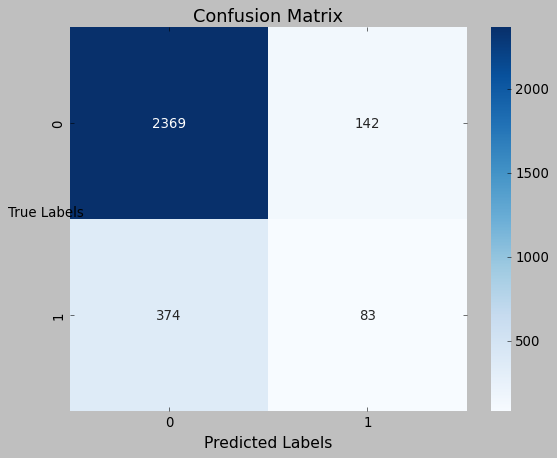

In [603]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

In [604]:
print(metrics.classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2511
         1.0       0.37      0.18      0.24       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968



In [605]:
y_test_predict = NB_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

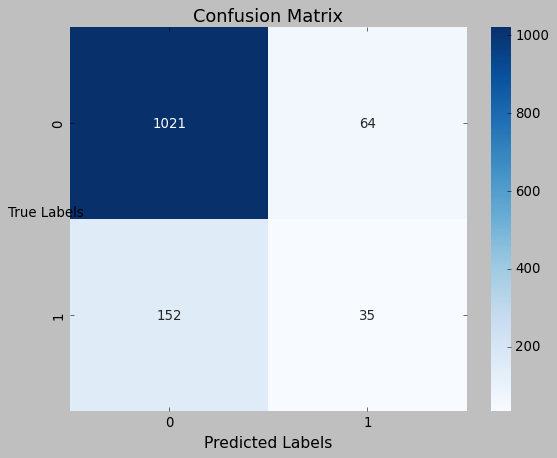

In [606]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

In [607]:
print(metrics.classification_report(y_test_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1173
         1.0       0.19      0.35      0.24        99

    accuracy                           0.83      1272
   macro avg       0.56      0.61      0.57      1272
weighted avg       0.88      0.83      0.85      1272



## Decision Tree

In [609]:
## Decision Tree
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



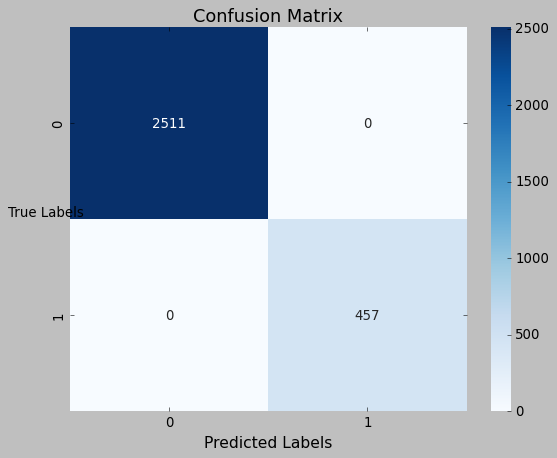

In [610]:
## on Train Data
y_train_predict = DT_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1070
         1.0       0.25      0.23      0.24       202

    accuracy                           0.77      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.76      0.77      0.76      1272



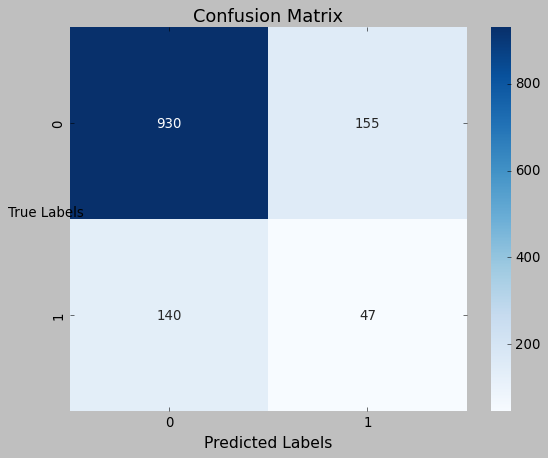

In [611]:
## on Test data
y_test_predict = DT_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_test_predict,y_test))

## Random Forest - is an ensemble method

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



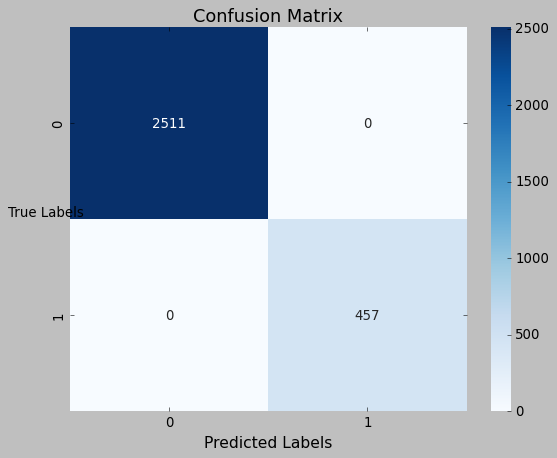

In [613]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

## on Train Data
y_train_predict = RF_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1250
         1.0       0.05      0.41      0.09        22

    accuracy                           0.85      1272
   macro avg       0.52      0.63      0.50      1272
weighted avg       0.97      0.85      0.90      1272



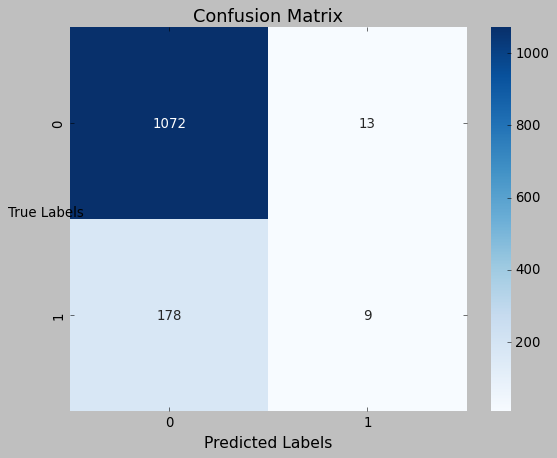

In [614]:
## on Test data
y_test_predict = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_test_predict,y_test))

## ADABoost 

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2880
         1.0       0.14      0.74      0.24        88

    accuracy                           0.86      2968
   macro avg       0.57      0.80      0.58      2968
weighted avg       0.97      0.86      0.90      2968



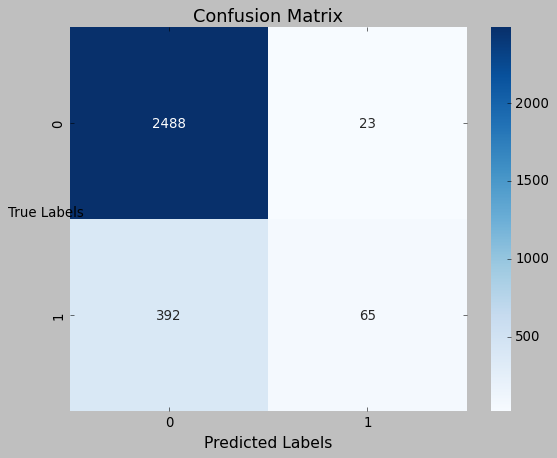

In [616]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

## on Train Data
y_train_predict = ADB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91      1231
         1.0       0.07      0.34      0.12        41

    accuracy                           0.84      1272
   macro avg       0.52      0.60      0.52      1272
weighted avg       0.95      0.84      0.89      1272



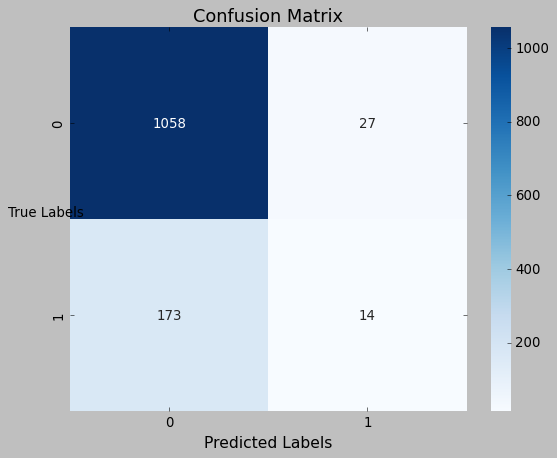

In [617]:
## on Test data
y_test_predict = ADB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_test_predict,y_test))

## Gradient Boosting

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      2860
         1.0       0.23      0.95      0.36       108

    accuracy                           0.88      2968
   macro avg       0.61      0.91      0.65      2968
weighted avg       0.97      0.88      0.91      2968



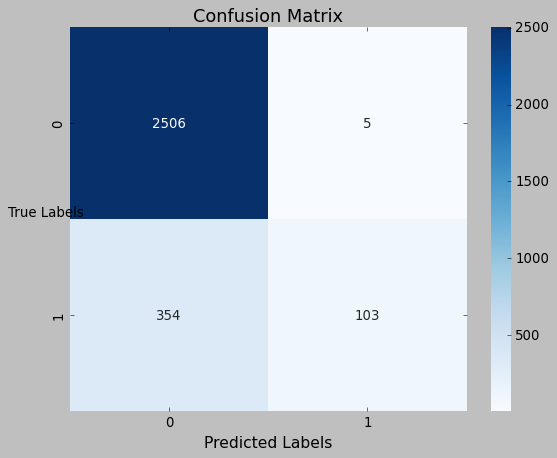

In [619]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(random_state=1)
GB_model.fit(X_train,y_train)

## on Train Data
y_train_predict = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1241
         1.0       0.07      0.45      0.13        31

    accuracy                           0.85      1272
   macro avg       0.53      0.66      0.52      1272
weighted avg       0.96      0.85      0.90      1272



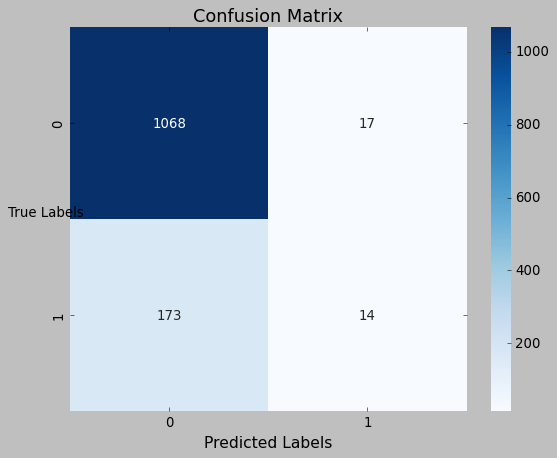

In [620]:
## on Test data
y_test_predict = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_test_predict,y_test))

## KNN model

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2825
         1.0       0.24      0.76      0.36       143

    accuracy                           0.87      2968
   macro avg       0.61      0.82      0.64      2968
weighted avg       0.95      0.87      0.90      2968



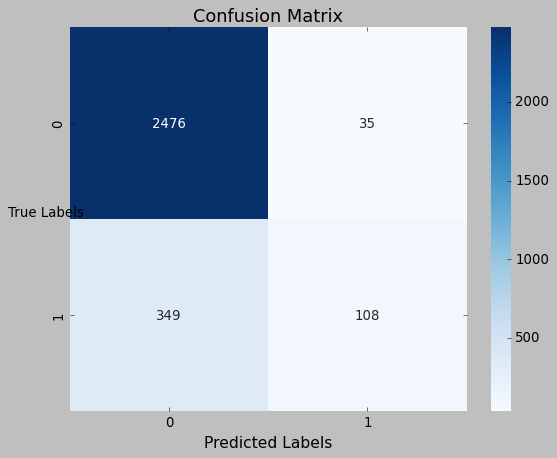

In [622]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

## on Train Data
y_train_predict = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.91      1224
         1.0       0.04      0.17      0.07        48

    accuracy                           0.83      1272
   macro avg       0.50      0.51      0.49      1272
weighted avg       0.93      0.83      0.87      1272



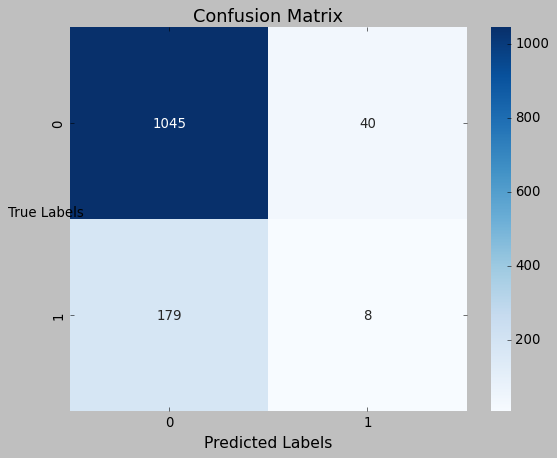

In [623]:
## on Test data
y_test_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_test_predict,y_test))

## Grid Search

In [625]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grids for different models
param_grids = {
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example hyperparameter for Naive Bayes
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Iterate through models and perform Grid Search
best_estimators = {}
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    # Initialize GridSearchCV with the model and its parameter grid
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model to the data (replace X_train and y_train with your data)
    grid_search.fit(X_train, y_train)
    
    # Save the best estimator found by GridSearchCV
    best_estimators[name] = grid_search.best_estimator_
    
    # Print the best parameters and accuracy score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best accuracy for {name}: {grid_search.best_score_:.4f}\n")

# The best_estimators dictionary contains the best model for each classifier


Running GridSearchCV for Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best accuracy for Naive Bayes: 0.8268

Running GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best accuracy for Decision Tree: 0.8123

Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8514

Running GridSearchCV for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 150}
Best accuracy for AdaBoost: 0.8480

Running GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best accuracy for Gradient Boosting: 0.8497

Running GridSearchCV for KNN...
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy for KNN: 0.8430



## SMOTE - identify where class imbalance is there and finds the nearest neighbour and generates synthetic data

In [627]:
df_mean['Heart-Att'].value_counts()

Heart-Att
0.0    3596
1.0     644
Name: count, dtype: int64

In [628]:
df_mean['Heart-Att'].value_counts() * 100/df_mean.shape[0]

Heart-Att
0.0    84.811321
1.0    15.188679
Name: count, dtype: float64

Big class imbalance in the data 

In [630]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are your new balanced training datasets
print(f"Original training set class distribution: {y_train.value_counts()}")
print(f"SMOTE training set class distribution: {y_train_smote.value_counts()}")

Original training set class distribution: Heart-Att
0.0    2511
1.0     457
Name: count, dtype: int64
SMOTE training set class distribution: Heart-Att
0.0    2511
1.0    2511
Name: count, dtype: int64


              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86      1949
         1.0       0.98      0.80      0.89      3073

    accuracy                           0.87      5022
   macro avg       0.87      0.89      0.87      5022
weighted avg       0.90      0.87      0.87      5022



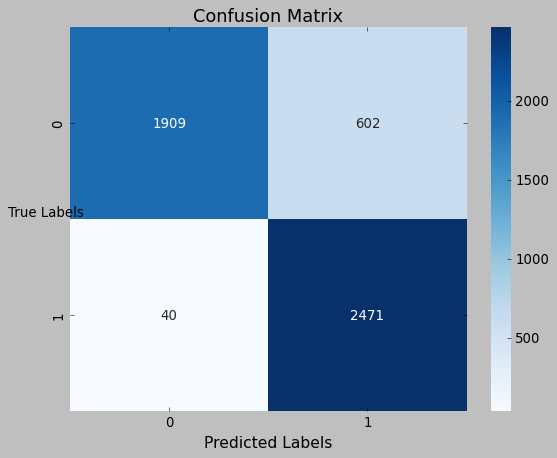

In [631]:
## KNN model smote
from sklearn.neighbors import KNeighborsClassifier

KNN_model_s = KNeighborsClassifier()
KNN_model_s.fit(X_train_smote,y_train_smote)

## on Train Data
y_train_predict = KNN_model_s.predict(X_train_smote)

sns.heatmap((metrics.confusion_matrix(y_train_smote,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_train_predict,y_train_smote))

              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75       802
         1.0       0.48      0.19      0.27       470

    accuracy                           0.62      1272
   macro avg       0.56      0.53      0.51      1272
weighted avg       0.58      0.62      0.57      1272



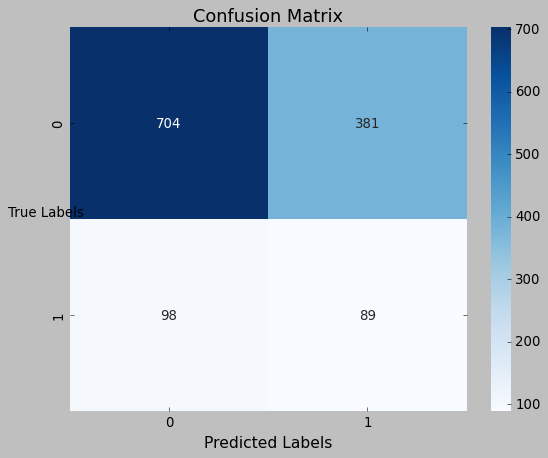

In [632]:
## on Test data
y_test_predict = KNN_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', rotation=0);
plt.title('Confusion Matrix', fontsize=16)

print(metrics.classification_report(y_test_predict,y_test))

In [633]:
# def get_metrics_score(model,flag=True):
#     score_list = []

#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)

#     train_acc = model.score(X_train,y_train)
#     test_acc = model.score(X_test,y_test)

#     train_recall = metrics.recall_score(y_train,pred_train)
#     test_recall = metrics.recall_score(y_test,pred_test)

#     train_precision = metrics.precision_score(y_train,pred_train)
#     test_precision = metrics.precision_score(y_test,pred_test)

#     score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision)

In [634]:
def get_metrics_score(model, flag=True):
    score_list = []
    
    # Predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # Recall
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    # Precision
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    # F1 Score
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)
    
    # Append metrics to the score list
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))
    
    # Print metrics
    print(f"Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Training Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
    print(f"Training Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
    print(f"Training F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")
    
    # Optional: Print Confusion Matrix if flag is True
    if flag:
        print("\nConfusion Matrix for Training Data:")
        print(metrics.confusion_matrix(y_train, pred_train))
        print("\nConfusion Matrix for Test Data:")
        print(metrics.confusion_matrix(y_test, pred_test))
    
    return score_list

In [635]:
# Define empty lists to store train and test results for all metrics
train_accuracy_list = []
test_accuracy_list = []
train_precision_list = []
test_precision_list = []
train_recall_list = []
test_recall_list = []
train_f1_list = []
test_f1_list = []

# List of models
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model, KNN_model_s]

# Loop through each model
for model in models:
    print(f"Evaluating model: {model.__class__.__name__}")
    
    # Get metrics score
    scores = get_metrics_score(model, flag=False)  # flag=False to avoid confusion matrix print
    
    # Extract metrics from the returned score list
    train_accuracy = scores[0]  # Train accuracy is at index 0
    test_accuracy = scores[1]   # Test accuracy is at index 1
    
    train_recall = scores[2]    # Train recall is at index 2
    test_recall = scores[3]     # Test recall is at index 3
    
    train_precision = scores[4] # Train precision is at index 4
    test_precision = scores[5]  # Test precision is at index 5
    
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

    # Append the results to the respective lists
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    
    train_precision_list.append(train_precision)
    test_precision_list.append(test_precision)
    
    train_recall_list.append(train_recall)
    test_recall_list.append(test_recall)
    
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)

# Print all metrics
print("\nTrain Accuracy List:", train_accuracy_list)
print("Test Accuracy List:", test_accuracy_list)
print("\nTrain Precision List:", train_precision_list)
print("Test Precision List:", test_precision_list)
print("\nTrain Recall List:", train_recall_list)
print("Test Recall List:", test_recall_list)
print("\nTrain F1-Score List:", train_f1_list)
print("Test F1-Score List:", test_f1_list)

Evaluating model: DecisionTreeClassifier
Training Accuracy: 1.0000, Test Accuracy: 0.7681
Training Recall: 1.0000, Test Recall: 0.2513
Training Precision: 1.0000, Test Precision: 0.2327
Training F1 Score: 1.0000, Test F1 Score: 0.2416
Evaluating model: AdaBoostClassifier
Training Accuracy: 0.8602, Test Accuracy: 0.8428
Training Recall: 0.1422, Test Recall: 0.0749
Training Precision: 0.7386, Test Precision: 0.3415
Training F1 Score: 0.2385, Test F1 Score: 0.1228
Evaluating model: GradientBoostingClassifier
Training Accuracy: 0.8790, Test Accuracy: 0.8506
Training Recall: 0.2254, Test Recall: 0.0749
Training Precision: 0.9537, Test Precision: 0.4516
Training F1 Score: 0.3646, Test F1 Score: 0.1284
Evaluating model: KNeighborsClassifier
Training Accuracy: 0.8706, Test Accuracy: 0.8278
Training Recall: 0.2363, Test Recall: 0.0428
Training Precision: 0.7552, Test Precision: 0.1667
Training F1 Score: 0.3600, Test F1 Score: 0.0681
Evaluating model: GaussianNB
Training Accuracy: 0.8261, Test A

In [636]:
import pandas as pd

# List of model names for reference
model_names = ['DT_model_m', 'ADB_model_m', 'GB_model_m', 'KNN_model_m', 'NB_model_m', 
               'RF_model_m', 'KNN_model_s_m']

# Create a DataFrame to store the results
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Train Precision': train_precision_list,
    'Test Precision': test_precision_list,
    'Train Recall': train_recall_list,
    'Test Recall': test_recall_list,
    'Train F1-Score': train_f1_list,
    'Test F1-Score': test_f1_list
})

# Display the DataFrame
round(comparison_df,2)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,DT_model_m,1.00,0.77,1.00,0.23,1.00,0.25,1.00,0.24
1,ADB_model_m,0.86,0.84,0.74,0.34,0.14,0.07,0.24,0.12
2,GB_model_m,0.88,0.85,0.95,0.45,0.23,0.07,0.36,0.13
3,KNN_model_m,0.87,0.83,0.76,0.17,0.24,0.04,0.36,0.07
4,NB_model_m,0.83,0.83,0.37,0.35,0.18,0.19,0.24,0.24
5,RF_model_m,1.00,0.85,1.00,0.41,1.00,0.05,1.00,0.09
6,KNN_model_s_m,0.79,0.62,0.42,0.19,0.96,0.48,0.59,0.27


In [637]:
df_knn

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.4,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


## For KNN

In [639]:
df_knn.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [640]:
df_knn_o = df_knn.copy()

In [641]:
df_knn_o

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.4,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


In [642]:
for column in ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']:
    df_knn[column].fillna(df_knn[column].mode()[0],inplace = True)
    df_knn_o[column].fillna(df_knn_o[column].mode()[0],inplace = True)

In [643]:
df_knn_o.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

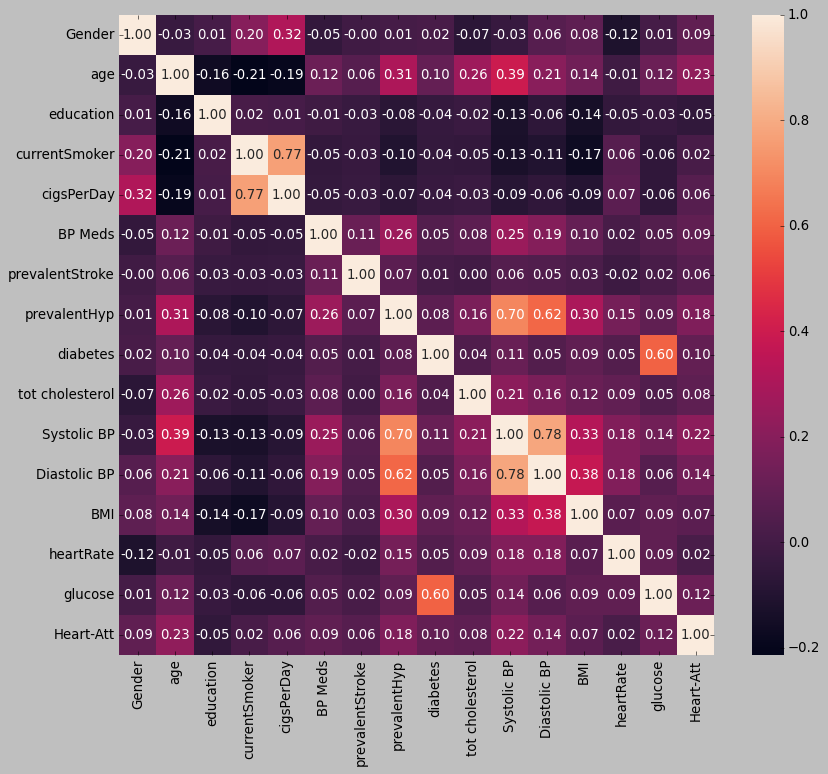

In [644]:
## correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(df_knn.corr(), annot=True, fmt=".2f")  # fmt=".2f" will round the numbers to 2 decimal places
plt.show()

In [645]:
df_knn.drop(['Diastolic BP','prevalentHyp','currentSmoker'],axis=1,inplace=True)

In [646]:
df_knn

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,diabetes,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,78.4,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,185.0,141.0,25.60,67.0,72.0,0.0


In [647]:
## min-max scaling on knn
df_knn2 = df_knn[['age', 'education', 'cigsPerDay','tot cholesterol', 'Systolic BP', 'BMI','heartRate','glucose','Heart-Att']].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [648]:
df_knn2['Gender']= df_knn['Gender']

In [649]:
df_knn2['education']= df_knn['education']
df_knn2['BP Meds']= df_knn['BP Meds']
df_knn2['prevalentStroke']= df_knn['prevalentStroke']
df_knn2['diabetes']= df_knn['diabetes']

In [650]:
df_knn2

,age,education,cigsPerDay,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att,Gender,BP Meds,prevalentStroke,diabetes
0,0.184211,4.0,0.000000,0.149406,0.106383,0.277024,0.363636,0.104520,0.0,1.0,0.0,0.0,0.0
1,0.368421,2.0,0.000000,0.242784,0.177305,0.319680,0.515152,0.101695,0.0,0.0,0.0,0.0,0.0
2,0.421053,1.0,0.285714,0.234295,0.208038,0.237518,0.313131,0.084746,0.0,1.0,0.0,0.0,0.0
3,0.763158,3.0,0.428571,0.200340,0.314421,0.316045,0.212121,0.177966,1.0,0.0,0.0,0.0,0.0
4,0.368421,3.0,0.328571,0.302207,0.219858,0.183228,0.414141,0.127119,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.421053,2.0,0.285714,0.239389,0.224586,0.156568,0.404040,0.129944,0.0,0.0,0.0,0.0,0.0
4236,0.315789,1.0,0.214286,0.174873,0.203310,0.087736,0.424242,0.108475,0.0,0.0,0.0,0.0,0.0
4237,0.526316,2.0,0.000000,0.275042,0.236407,0.143723,0.363636,0.189266,0.0,0.0,0.0,0.0,0.0
4238,0.210526,3.0,0.000000,0.132428,0.271868,0.243820,0.232323,0.090395,0.0,1.0,0.0,0.0,0.0


In [651]:
X = df_knn2.drop('Heart-Att',axis=1)
y = df_knn2['Heart-Att']
## test range split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [652]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [653]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [654]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [655]:
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [656]:
NB_model.fit(X_train,y_train)

GaussianNB()

In [657]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [669]:
# Define empty lists to store train and test results for all metrics
train_accuracy_list = []
test_accuracy_list = []
train_precision_list = []
test_precision_list = []
train_recall_list = []
test_recall_list = []
train_f1_list = []
test_f1_list = []

# List of models
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model,ADB_model_s,GB_model_S]

# Loop through each model
for model in models:
    print(f"Evaluating model: {model.__class__.__name__}")
    
    # Get metrics score
    scores = get_metrics_score(model, flag=False)  # flag=False to avoid confusion matrix print
    
    # Extract metrics from the returned score list
    train_accuracy = scores[0]  # Train accuracy is at index 0
    test_accuracy = scores[1]   # Test accuracy is at index 1
    
    train_recall = scores[2]    # Train recall is at index 2
    test_recall = scores[3]     # Test recall is at index 3
    
    train_precision = scores[4] # Train precision is at index 4
    test_precision = scores[5]  # Test precision is at index 5
    
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

    # Append the results to the respective lists
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    
    train_precision_list.append(train_precision)
    test_precision_list.append(test_precision)
    
    train_recall_list.append(train_recall)
    test_recall_list.append(test_recall)
    
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)

# Print all metrics
print("\nTrain Accuracy List:", train_accuracy_list)
print("Test Accuracy List:", test_accuracy_list)
print("\nTrain Precision List:", train_precision_list)
print("Test Precision List:", test_precision_list)
print("\nTrain Recall List:", train_recall_list)
print("Test Recall List:", test_recall_list)
print("\nTrain F1-Score List:", train_f1_list)
print("Test F1-Score List:", test_f1_list)

Evaluating model: DecisionTreeClassifier
Training Accuracy: 1.0000, Test Accuracy: 0.7712
Training Recall: 1.0000, Test Recall: 0.2406
Training Precision: 1.0000, Test Precision: 0.2320
Training F1 Score: 1.0000, Test F1 Score: 0.2362
Evaluating model: AdaBoostClassifier
Training Accuracy: 0.8578, Test Accuracy: 0.8459
Training Recall: 0.1357, Test Recall: 0.0749
Training Precision: 0.6966, Test Precision: 0.3784
Training F1 Score: 0.2271, Test F1 Score: 0.1250
Evaluating model: GradientBoostingClassifier
Training Accuracy: 0.8794, Test Accuracy: 0.8475
Training Recall: 0.2254, Test Recall: 0.0856
Training Precision: 0.9626, Test Precision: 0.4103
Training F1 Score: 0.3652, Test F1 Score: 0.1416
Evaluating model: KNeighborsClassifier
Training Accuracy: 0.8676, Test Accuracy: 0.8318
Training Recall: 0.2123, Test Recall: 0.0374
Training Precision: 0.7462, Test Precision: 0.1707
Training F1 Score: 0.3305, Test F1 Score: 0.0614
Evaluating model: GaussianNB
Training Accuracy: 0.8282, Test A

In [671]:
import pandas as pd

# List of model names for reference
model_names = ['DT_model_knn', 'ADB_model_knn', 'GB_model_knn', 'KNN_model_knn', 'NB_model_knn', 
               'RF_model_knn','ADB_model_s_knn','GB_model_S_knn']

# Create a DataFrame to store the results
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Train Precision': train_precision_list,
    'Test Precision': test_precision_list,
    'Train Recall': train_recall_list,
    'Test Recall': test_recall_list,
    'Train F1-Score': train_f1_list,
    'Test F1-Score': test_f1_list
})

# Display the DataFrame
round(comparison_df,2)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,DT_model_knn,1.00,0.77,1.00,0.23,1.00,0.24,1.00,0.24
1,ADB_model_knn,0.86,0.85,0.70,0.38,0.14,0.07,0.23,0.12
2,GB_model_knn,0.88,0.85,0.96,0.41,0.23,0.09,0.37,0.14
3,KNN_model_knn,0.87,0.83,0.75,0.17,0.21,0.04,0.33,0.06
4,NB_model_knn,0.83,0.83,0.37,0.36,0.16,0.18,0.23,0.24
5,RF_model_knn,1.00,0.85,1.00,0.47,1.00,0.05,1.00,0.09
6,ADB_model_s_knn,0.70,0.66,0.27,0.23,0.59,0.54,0.37,0.32
7,GB_model_S_knn,0.79,0.71,0.38,0.23,0.61,0.39,0.46,0.29


In [661]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are your new balanced training datasets
print(f"Original training set class distribution: {y_train.value_counts()}")
print(f"SMOTE training set class distribution: {y_train_smote.value_counts()}")

Original training set class distribution: Heart-Att
0.0    2511
1.0     457
Name: count, dtype: int64
SMOTE training set class distribution: Heart-Att
0.0    2511
1.0    2511
Name: count, dtype: int64


In [663]:
ADB_model_s = AdaBoostClassifier()

In [665]:
ADB_model_s.fit(X_train_smote,y_train_smote)

AdaBoostClassifier()

In [667]:
GB_model_S = GradientBoostingClassifier()
GB_model_S.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier()

## KNN outlier treatment

In [673]:
df_knn_o.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


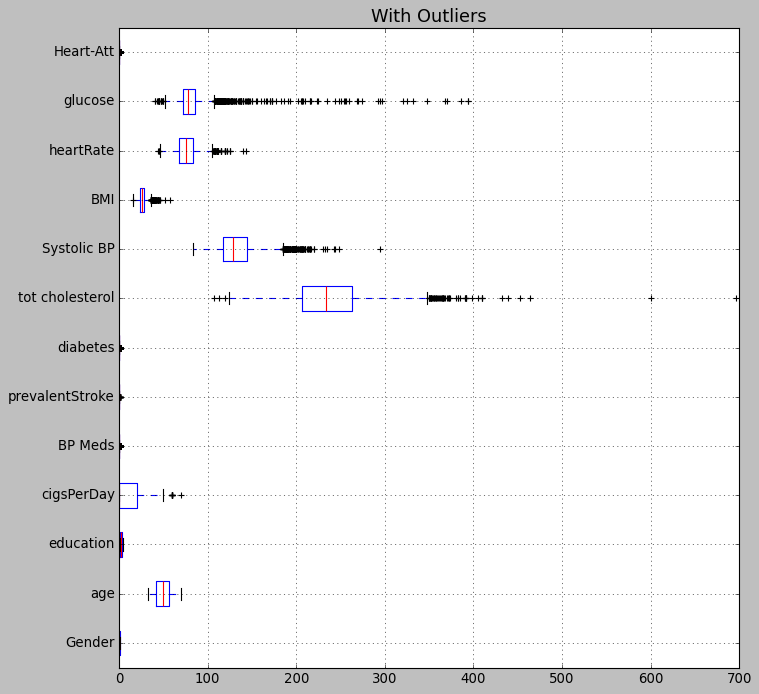

In [675]:
## Outlier Treatment for knn
plt.figure(figsize=(10,10))
df_knn.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [677]:
## Teating outlier for knn
# Iterate only over numeric columns
for column in df_knn_o.drop(['glucose','Heart-Att'],axis=1).columns:
    
    lr, ur = remove_outlier(df_knn_o[column])
    
    # Replace values greater than upper range with upper range value
    df_knn_o[column] = np.where(df_knn_o[column] > ur, ur, df_knn_o[column])
    
    # Replace values smaller than lower range with lower range value
    df_knn_o[column] = np.where(df_knn_o[column] < lr, lr, df_knn_o[column])

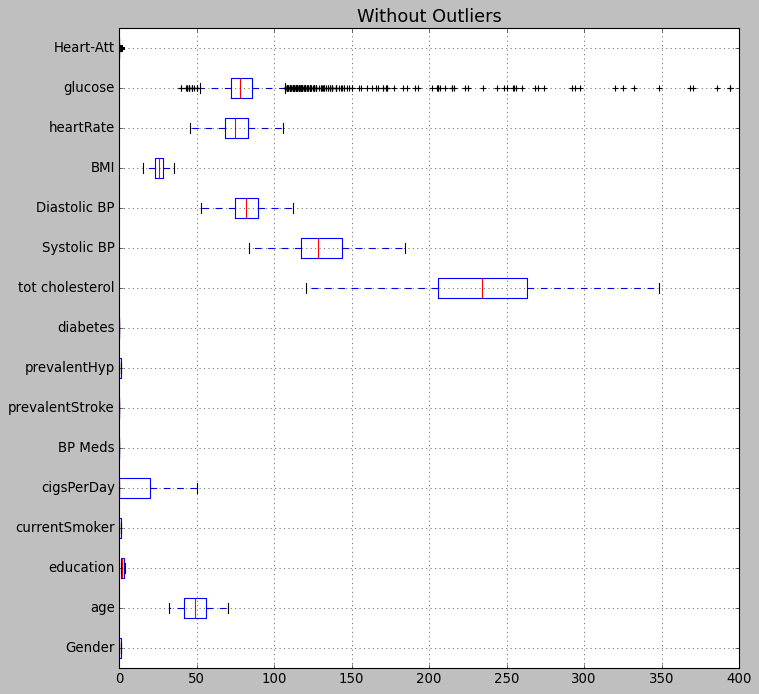

In [679]:
plt.figure(figsize=(10,10))
df_knn_o.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

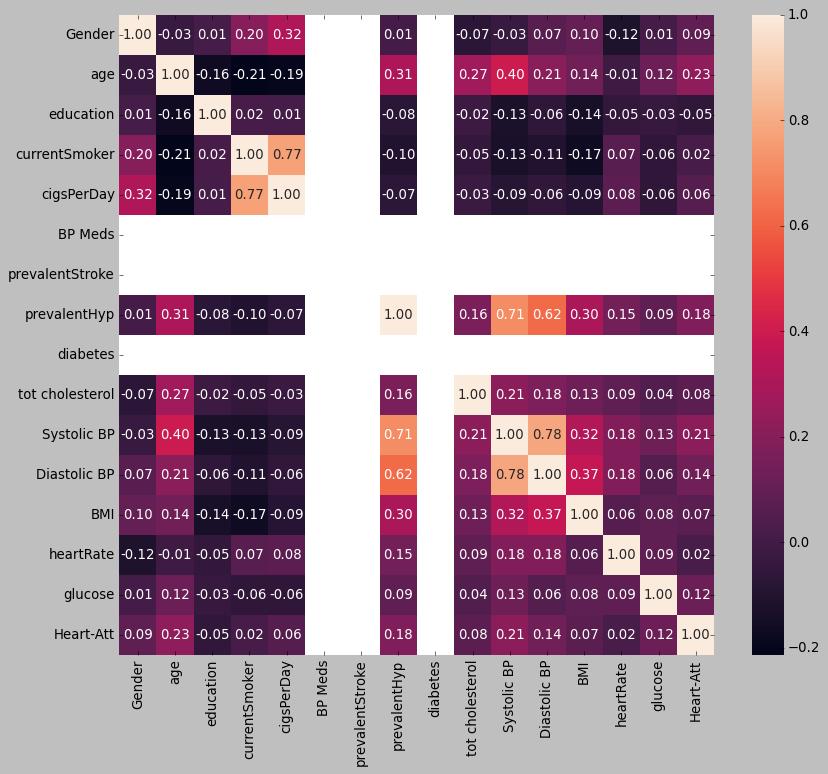

In [681]:
## correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(df_knn_o.corr(), annot=True, fmt=".2f")  # fmt=".2f" will round the numbers to 2 decimal places
plt.show()

In [ ]:
df_knn_o.drop(['Diastolic BP','prevalentHyp','currentSmoker'],axis=1,inplace=True)

In [683]:
X = df_knn_o.drop('Heart-Att',axis=1)
y = df_knn_o['Heart-Att']
## test range split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [685]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [687]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [689]:
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [691]:
NB_model.fit(X_train,y_train)

GaussianNB()

In [693]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [695]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are your new balanced training datasets
print(f"Original training set class distribution: {y_train.value_counts()}")
print(f"SMOTE training set class distribution: {y_train_smote.value_counts()}")

Original training set class distribution: Heart-Att
0.0    2511
1.0     457
Name: count, dtype: int64
SMOTE training set class distribution: Heart-Att
0.0    2511
1.0    2511
Name: count, dtype: int64


In [697]:
ADB_model_s = AdaBoostClassifier()
ADB_model_s.fit(X_train_smote,y_train_smote)

AdaBoostClassifier()

In [699]:
GB_model_S = GradientBoostingClassifier()
GB_model_S.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier()

In [701]:
import pandas as pd

# List of model names for reference
model_names = ['DT_model_knn_o', 'ADB_model_knn_o', 'GB_model_knn_o', 'KNN_model_knn_o', 'NB_model_knn_o', 
               'RF_model_knn_o','ADB_model_s_knn_o','GB_model_S_knn_o']

# Create a DataFrame to store the results
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Train Precision': train_precision_list,
    'Test Precision': test_precision_list,
    'Train Recall': train_recall_list,
    'Test Recall': test_recall_list,
    'Train F1-Score': train_f1_list,
    'Test F1-Score': test_f1_list
})

# Display the DataFrame
round(comparison_df,2)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,DT_model_knn_o,1.00,0.77,1.00,0.23,1.00,0.24,1.00,0.24
1,ADB_model_knn_o,0.86,0.85,0.70,0.38,0.14,0.07,0.23,0.12
2,GB_model_knn_o,0.88,0.85,0.96,0.41,0.23,0.09,0.37,0.14
3,KNN_model_knn_o,0.87,0.83,0.75,0.17,0.21,0.04,0.33,0.06
4,NB_model_knn_o,0.83,0.83,0.37,0.36,0.16,0.18,0.23,0.24
5,RF_model_knn_o,1.00,0.85,1.00,0.47,1.00,0.05,1.00,0.09
6,ADB_model_s_knn_o,0.70,0.66,0.27,0.23,0.59,0.54,0.37,0.32
7,GB_model_S_knn_o,0.79,0.71,0.38,0.23,0.61,0.39,0.46,0.29


In [703]:
df_knn_o = df_knn_o.to_csv('df_knn_o.csv')

In [705]:
df_knn2 = df_knn2.to_csv('df_knn.csv')

In [707]:
comparison_df = comparison_df.to_csv('Model_Comparision.csv')

AttributeError: 'NoneType' object has no attribute 'head'